In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate
from fastai import *

In [0]:
bs = 64
#bs = 16  # uncomment this line if you run out of memory even after clicking Kernel->Restart

In [4]:
path = untar_data(URLs.MNIST); path

PosixPath('/root/.fastai/data/mnist_png')

In [5]:
path.ls()

[PosixPath('/root/.fastai/data/mnist_png/training'),
 PosixPath('/root/.fastai/data/mnist_png/testing')]

In [6]:
path.ls()

[PosixPath('/root/.fastai/data/mnist_png/training'),
 PosixPath('/root/.fastai/data/mnist_png/testing')]

In [7]:
path

PosixPath('/root/.fastai/data/mnist_png')

In [0]:
np.random.seed(2)

In [0]:
data = ImageDataBunch.from_folder(path,ds_tfms=get_transforms(), valid_pct=0.2,size=28, bs=bs).normalize(imagenet_stats)

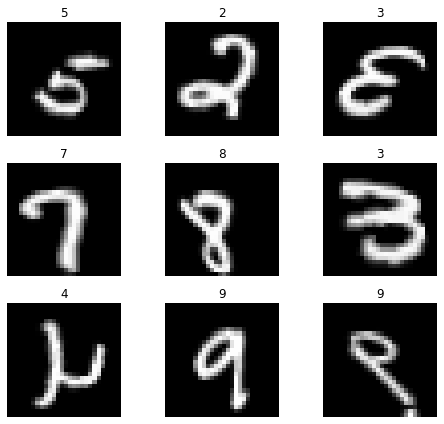

In [10]:
data.show_batch(rows=3, figsize=(7,6))

In [11]:
print(data.classes)
len(data.classes),data.c

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


(10, 10)

In [12]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [13]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.860476,0.602745,0.200786,01:23
1,0.414288,0.269443,0.087071,01:22
2,0.310971,0.192200,0.061143,01:23
3,0.261899,0.192811,0.060929,01:23


In [0]:
learn.save('/home/stage-1')

In [17]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

In [18]:
interp = ClassificationInterpretation.from_learner(learn)

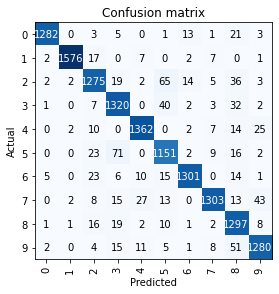

In [19]:
interp.plot_confusion_matrix()

In [0]:
learn.unfreeze()

In [21]:
  learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


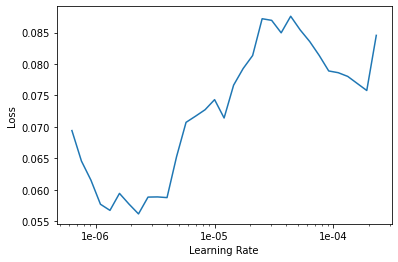

In [0]:
learn.recorder.plot()

In [0]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (56000 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
0,0,0,0,0
Path: /root/.fastai/data/mnist_png;

Valid: LabelList (14000 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
2,5,3,2,3
Path: /root/.fastai/data/mnist_png;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_runnin

In [0]:
from fastai.widgets import *

In [0]:
db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

In [0]:

learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)

learn_cln.load('stage-1');

In [0]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

In [0]:
ds, idxs = DatasetFormatter().from_similars(learn_cln)

Getting activations...


RuntimeError: ignored

In [0]:
os.listdir()

['.config', '10.jpg', '8.jpg', '9.jpg', 'sample_data']

In [0]:
learn.export()

In [0]:

defaults.device = torch.device('cpu')

In [0]:
img = open_image('7.jpg')

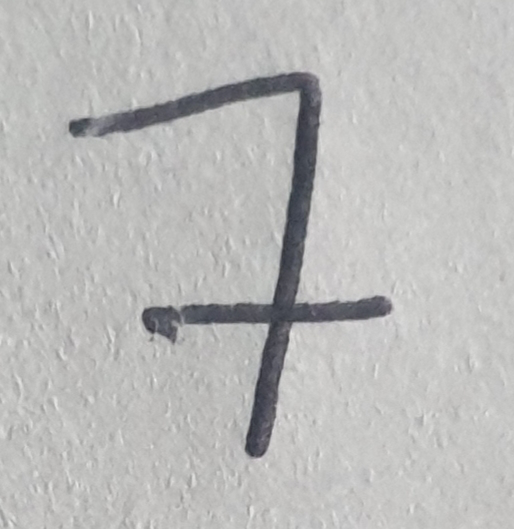

In [0]:
img

In [0]:
learn = load_learner(path)

In [0]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category 4